In [275]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.constants as const
from matplotlib import font_manager

In [276]:
font_path = "C:/Windows/Fonts/Arial.ttf"
font_prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['axes.unicode_minus'] = False  # 유니코드 마이너스 기호 문제 해결


In [277]:
# Read raw data
conditions = []
with open('qt_conditions_list.txt','r') as file:
    for line in file:        
        line = line.strip()
        line = line[2:]
        conditions.append(line)
    file.close()

species = []
with open('qt_species_list.txt','r') as file:
    i = 0
    for line in file:        
        line = line.strip()
        if i < 9:
            line = line[2:]
        else:
            line = line[3:]
        species.append(line)
        i += 1
    file.close()

reactions = []
with open('qt_reactions_list.txt','r') as file:
    for line in file:        
        line = line.strip()
        line = line[2:]
        reactions.append(line)
    file.close()

df_cd = pd.read_csv('qt_conditions.txt', sep=r'\s+', header=0, names=['Time [s]']+conditions)
df_sp = pd.read_csv('qt_densities.txt', sep=r'\s+', header=0, names=['Time [s]']+species)
df_rx = pd.read_csv('qt_rates.txt', sep=r'\s+', header=0, names=['Time [s]']+reactions)

In [278]:
sorted(species)

['C2H',
 'C2H2',
 'C2H2(V13)',
 'C2H2(V2)',
 'C2H2(V5)',
 'C2H2^+',
 'C2H3',
 'C2H3^+',
 'C2H4',
 'C2H4(V1)',
 'C2H4(V2)',
 'C2H4^+',
 'C2H5',
 'C2H5^+',
 'C2H6',
 'C2H6(V13)',
 'C2H6(V24)',
 'C2H6^+',
 'C3H4',
 'C3H4^+',
 'C3H5',
 'C3H5^+',
 'C3H6',
 'C3H6(V)',
 'C3H6^+',
 'C3H7',
 'C3H7^+',
 'C3H8',
 'C3H8(V1)',
 'C3H8(V2)',
 'C3H8^+',
 'C4H9',
 'C5H12',
 'CH',
 'CH2',
 'CH2^+',
 'CH3',
 'CH3^+',
 'CH4',
 'CH4(V13)',
 'CH4(V24)',
 'CH4^+',
 'CH5^+',
 'CH^+',
 'E',
 'H',
 'H2',
 'H2^+',
 'H3^+',
 'H^+']

In [279]:
df_CH4 = df_sp['CH4'] + df_sp['CH4(V13)'] + df_sp['CH4(V24)'] + df_sp['CH4^+']
df_C2H6 = df_sp['C2H6'] + df_sp['C2H6(V13)'] + df_sp['C2H6(V24)'] + df_sp['C2H6^+']
df_C2H4 = df_sp['C2H4'] + df_sp['C2H4(V1)'] + df_sp['C2H4(V2)'] + df_sp['C2H4^+']
df_CH3 = df_sp['CH3'] + df_sp['CH3^+']
df_C2H2 = df_sp['C2H2'] + df_sp['C2H2(V13)'] + df_sp['C2H2(V2)'] + df_sp['C2H2(V5)'] + df_sp['C2H2^+']
df_C3H8 = df_sp['C3H8'] + df_sp['C3H8(V1)'] + df_sp['C3H8(V2)'] + df_sp['C3H8^+']
df_C3H6 = df_sp['C3H6'] + df_sp['C3H6(V)'] + df_sp['C3H6^+']
df_C4H9 = df_sp['C4H9']
df_H2 = df_sp['H2'] + df_sp['H2^+']
df_C5H12 = df_sp['C5H12']

In [280]:
M_CH4 = df_CH4 / const.N_A * 16
M_C2H6 = df_C2H6 / const.N_A * 30
M_C2H4 = df_C2H4 / const.N_A * 28
M_C2H2 = df_C2H2 / const.N_A * 26
M_C3H8 = df_C3H8 / const.N_A * 44
M_C3H6 = df_C3H6 / const.N_A * 42
M_C4H9 = df_C4H9 / const.N_A * 57
M_CH3 = df_CH3 / const.N_A * 15
M_H2 = df_H2 / const.N_A * 2
M_C5H12 = df_C5H12 / const.N_A * 72

In [281]:
Conv_CH4 = (M_CH4.iloc[0] - M_CH4) / M_CH4.iloc[0] * 100
Sel_C2H6 = M_C2H6 / (M_CH4.iloc[0] - M_CH4) * 100
Sel_C2H4 = M_C2H4 / (M_CH4.iloc[0] - M_CH4) * 100
Sel_C2H2 = M_C2H2 / (M_CH4.iloc[0] - M_CH4) * 100
Sel_C3H8 = M_C3H8 / (M_CH4.iloc[0] - M_CH4) * 100
Sel_C3H6 = M_C3H6 / (M_CH4.iloc[0] - M_CH4) * 100
Sel_C4H9 = M_C4H9 / (M_CH4.iloc[0] - M_CH4) * 100
Sel_CH3 = M_CH3 / (M_CH4.iloc[0] - M_CH4) * 100
Sel_H2 = M_H2 / (M_CH4.iloc[0] - M_CH4) * 100
Sel_C5H12 = M_C5H12 / (M_CH4.iloc[0] - M_CH4) * 100

In [282]:
Sel_H2.iloc[-1] + Sel_CH3.iloc[-1] + Sel_C2H6.iloc[-1]

36.364049596637074

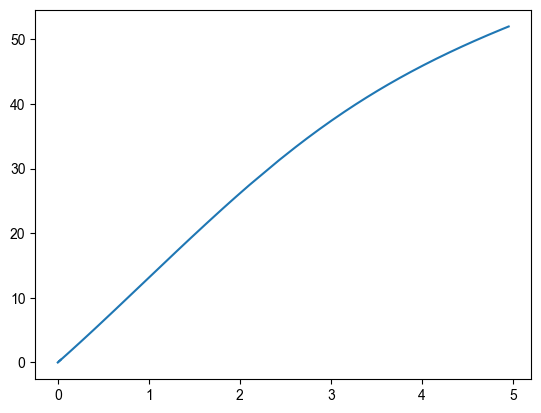

In [283]:
plt.plot(df_sp['Time [s]'], Conv_CH4)

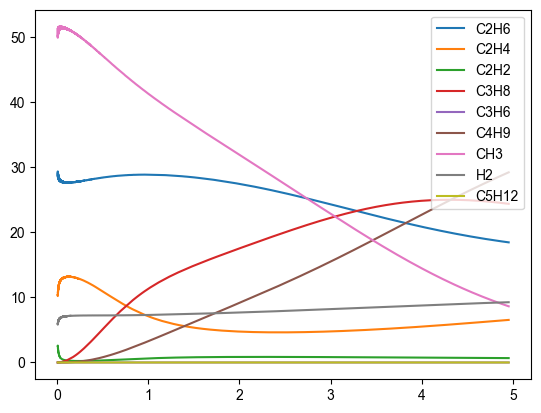

In [284]:
plt.plot(df_sp['Time [s]'].iloc[100:], Sel_C2H6.iloc[100:], label='C2H6')
plt.plot(df_sp['Time [s]'].iloc[100:], Sel_C2H4.iloc[100:], label='C2H4')
plt.plot(df_sp['Time [s]'].iloc[100:], Sel_C2H2.iloc[100:], label='C2H2')
plt.plot(df_sp['Time [s]'].iloc[100:], Sel_C3H8.iloc[100:], label='C3H8')
plt.plot(df_sp['Time [s]'].iloc[100:], Sel_C3H6.iloc[100:], label='C3H6')
plt.plot(df_sp['Time [s]'].iloc[100:], Sel_C4H9.iloc[100:], label='C4H9')
plt.plot(df_sp['Time [s]'].iloc[100:], Sel_CH3.iloc[100:], label='CH3')
plt.plot(df_sp['Time [s]'].iloc[100:], Sel_H2.iloc[100:], label='H2')
plt.plot(df_sp['Time [s]'].iloc[100:], Sel_C5H12.iloc[100:], label='C5H12')
plt.legend()

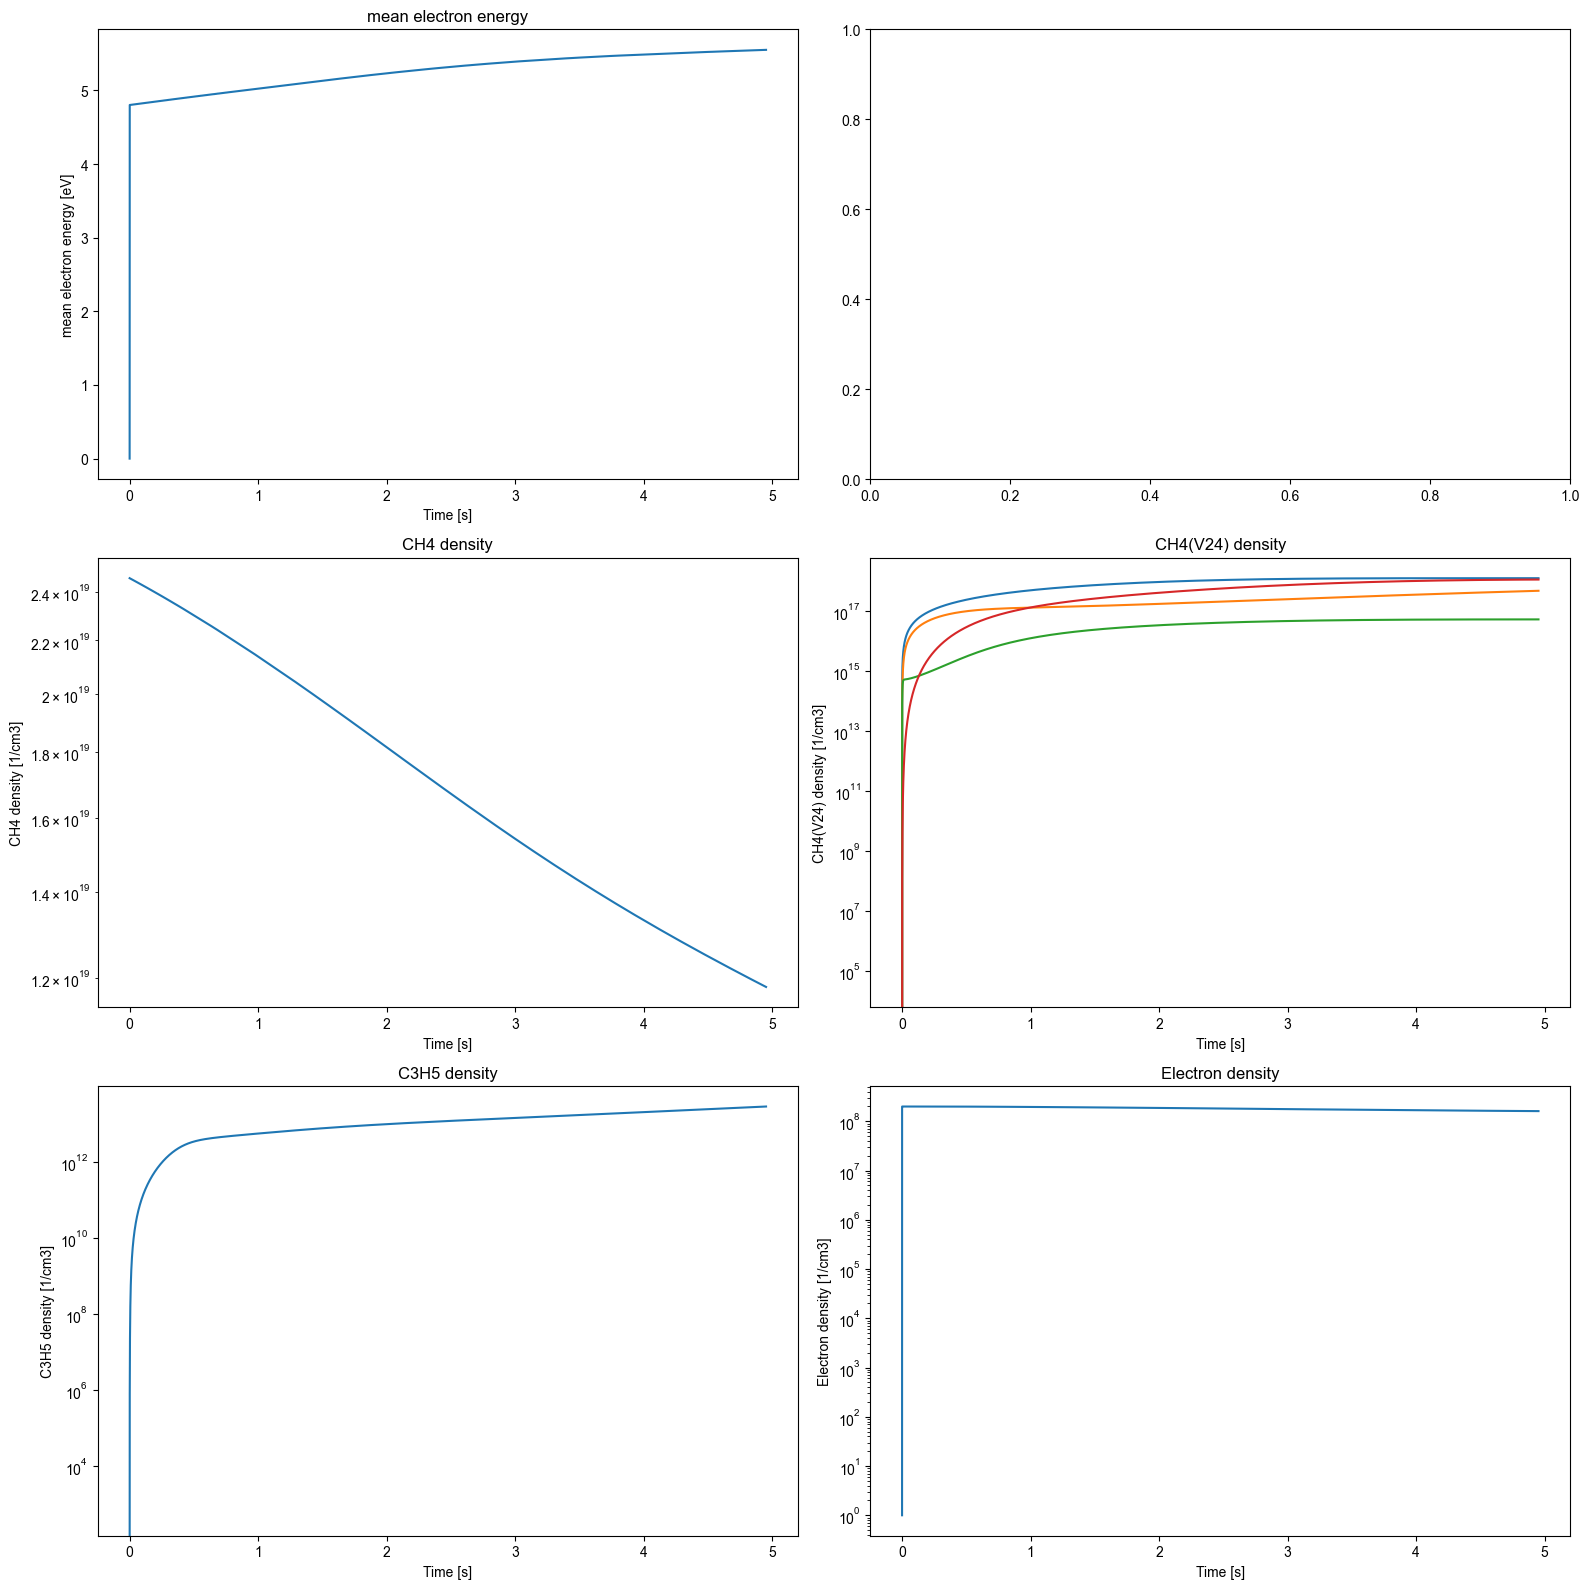

In [285]:
fig, axs = plt.subplots(3,2,figsize=(16,16))

axs[0,0].plot(df_cd['Time [s]'],df_cd['Electron temperature [K]'] / const.e * const.k)
axs[0,0].set_xlabel('Time [s]')
axs[0,0].set_ylabel('mean electron energy [eV]')
axs[0,0].set_title('mean electron energy')


axs[1,0].plot(df_sp['Time [s]'],df_sp['CH4']+df_sp['CH4(V13)']+df_sp['CH4(V24)'])
axs[1,0].set_yscale('log')
axs[1,0].set_xlabel('Time [s]')
axs[1,0].set_ylabel('CH4 density [1/cm3]')
axs[1,0].set_title('CH4 density')

axs[1,1].plot(df_sp['Time [s]'],df_sp['C2H6'] + df_sp['C2H6(V13)'] + df_sp['C2H6(V24)'] )
axs[1,1].plot(df_sp['Time [s]'],df_sp['C2H4'] + df_sp['C2H4(V1)'] + df_sp['C2H4(V2)'])
axs[1,1].plot(df_sp['Time [s]'],df_sp['C2H2'] + df_sp['C2H2(V5)'] + df_sp['C2H2(V2)'] + df_sp['C2H2(V13)'])
axs[1,1].plot(df_sp['Time [s]'],df_sp['C3H8'] + df_sp['C3H8(V1)'] + df_sp['C3H8(V2)'])
axs[1,1].set_yscale('log')
axs[1,1].set_xlabel('Time [s]')
axs[1,1].set_ylabel('CH4(V24) density [1/cm3]')
axs[1,1].set_title('CH4(V24) density')

axs[2,0].plot(df_sp['Time [s]'],df_sp[species[2]])
axs[2,0].set_yscale('log')
axs[2,0].set_xlabel('Time [s]')
axs[2,0].set_ylabel(species[2]+' density [1/cm3]')
axs[2,0].set_title(species[2]+' density')

axs[2,1].plot(df_sp['Time [s]'],df_sp['E'])
axs[2,1].set_yscale('log')
axs[2,1].set_xlabel('Time [s]')
axs[2,1].set_ylabel('Electron density [1/cm3]')
axs[2,1].set_title('Electron density')

plt.tight_layout()
plt.show()

In [286]:
for i in range(len(species)):
    print(f'{species[i]}: {df_sp[species[i]].iloc[-1]}')

E: 160800000.0
H2: 9.4761e+18
C3H5: 28383000000000.0
C2H4(V2): 2.2472e+16
CH4: 4.8434e+18
C2H3^+: 2235500.0
H^+: 5.1905e-05
C3H5^+: 143390.0
C3H6: 5233000000000.0
CH2: 12637000000.0
C5H12: 0.0
C3H8: 8.4568e+17
H: 144030000000000.0
C2H2^+: 727840.0
C2H6^+: 777150.0
C2H4(V1): 7.7723e+16
C3H4: 1.4299e+17
C2H: 2.2031e-07
C2H2: 3.3946e+16
C2H6: 8.3338e+17
C2H2(V5): 1.2114e+16
C3H8^+: 649540.0
C3H7: 160040000000000.0
CH3: 1.1779e+18
CH4^+: 13986000.0
H3^+: 15.002
CH2^+: 11633000.0
CH^+: 103490.0
C2H2(V13): 2639700000000000.0
C3H7^+: 381350.0
C2H2(V2): 4259100000000000.0
C2H4^+: 6244800.0
C2H6(V24): 2.2006e+17
C2H6(V13): 2.0584e+17
C2H4: 3.7794e+17
CH4(V13): 3.3738e+18
C3H8(V1): 1.627e+17
C2H5: 14042000000000.0
C4H9: 1.0492e+18
C3H8(V2): 1.2567e+17
CH5^+: 99186000.0
C3H6(V): 2135500000000.0
CH4(V24): 3.5956e+18
C2H5^+: 7078200.0
H2^+: 1855900.0
CH: 502.38
C3H4^+: 385540.0
CH3^+: 15361000.0
C3H6^+: 55014.0
C2H3: 29346000000000.0
